In [1]:
### 6.5.1 图像数据的读入
import numpy as np
import pandas as pd
import os
print(os.listdir("./dataset/images/Images"))

['n02085620-Chihuahua', 'n02085782-Japanese_spaniel', 'n02085936-Maltese_dog', 'n02086079-Pekinese', 'n02086240-Shih-Tzu', 'n02086646-Blenheim_spaniel', 'n02086910-papillon', 'n02087046-toy_terrier', 'n02087394-Rhodesian_ridgeback', 'n02088094-Afghan_hound', 'n02088238-basset', 'n02088364-beagle', 'n02088466-bloodhound', 'n02088632-bluetick', 'n02089078-black-and-tan_coonhound', 'n02089867-Walker_hound', 'n02089973-English_foxhound', 'n02090379-redbone', 'n02090622-borzoi', 'n02090721-Irish_wolfhound', 'n02091032-Italian_greyhound', 'n02091134-whippet', 'n02091244-Ibizan_hound', 'n02091467-Norwegian_elkhound', 'n02091635-otterhound', 'n02091831-Saluki', 'n02092002-Scottish_deerhound', 'n02092339-Weimaraner', 'n02093256-Staffordshire_bullterrier', 'n02093428-American_Staffordshire_terrier', 'n02093647-Bedlington_terrier', 'n02093754-Border_terrier', 'n02093859-Kerry_blue_terrier', 'n02093991-Irish_terrier', 'n02094114-Norfolk_terrier', 'n02094258-Norwich_terrier', 'n02094433-Yorkshire_t

In [2]:
# 本示例处理10种狗
dir = './dataset/images/Images/'
chihuahua_dir = dir + 'n02085620-Chihuahua' # 吉娃娃
japanese_spaniel_dir = dir + 'n02085782-Japanese_spaniel' # 日本狆
maltese_dir = dir+'n02085936-Maltese_dog' #马尔济斯犬
pekinese_dir = dir+'n02086079-Pekinese' #北京狮子狗
shitzu_dir = dir+'n02086240-Shih-Tzu' #西施犬
blenheim_spaniel_dir = dir+'n02086646-Blenheim_spaniel' #英国可卡犬
papillon_dir = dir+'n02086910-papillon' #蝴蝶犬
toy_terrier_dir = dir+'n02087046-toy_terrier' #玩具猎狐梗
afghan_hound_dir = dir+'n02088094-Afghan_hound' #阿富汗猎犬
basset_dir = dir+'n02088238-basset' #巴吉度猎犬

In [3]:
import cv2  # 导入Open CV工具箱
X = []
y_label = []
imgsize = 150
# 定义一个函数读入狗的图片
def training_data(label, data_dir):
    print("正在读入：", data_dir)
    for img in os.listdir(data_dir):
        path = os.path.join(data_dir, img)
        img = cv2.imread(path, cv2.IMREAD_COLOR)
        img = cv2.resize(img, (imgsize, imgsize))
        X.append(np.array(img))
        y_label.append(str(label))

# 读入10个目录中的狗狗图片
training_data('chihuahua',chihuahua_dir)
training_data('japanese_spaniel',japanese_spaniel_dir)
training_data('maltese',maltese_dir)
training_data('pekinese',pekinese_dir)
training_data('shitzu',shitzu_dir)
training_data('blenheim_spaniel',blenheim_spaniel_dir)
training_data('papillon',papillon_dir)
training_data('toy_terrier',toy_terrier_dir)
training_data('afghan_hound',afghan_hound_dir)
training_data('basset',basset_dir)

正在读入： ./dataset/images/Images/n02085620-Chihuahua
正在读入： ./dataset/images/Images/n02085782-Japanese_spaniel
正在读入： ./dataset/images/Images/n02085936-Maltese_dog
正在读入： ./dataset/images/Images/n02086079-Pekinese
正在读入： ./dataset/images/Images/n02086240-Shih-Tzu
正在读入： ./dataset/images/Images/n02086646-Blenheim_spaniel
正在读入： ./dataset/images/Images/n02086910-papillon
正在读入： ./dataset/images/Images/n02087046-toy_terrier
正在读入： ./dataset/images/Images/n02088094-Afghan_hound
正在读入： ./dataset/images/Images/n02088238-basset


In [4]:
# 构建X、y张量
# 并将标签从文本转换为One-hot格式的分类编码。

from sklearn.preprocessing import LabelEncoder  # 导入标签编码工具
from keras.utils.np_utils import to_categorical # 导入One-hot编码工具
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y_label)    # 标签编码
y = to_categorical(y, 10) # 将标签转换为One-hot编码
X = np.array(X) # 将X从列表转换为张量数组
X = X/255 # 将X张量归一化

In [5]:
# 显示向量化之后的图像

print('X张量的形状：', X.shape)
print('X张量的第一个数据：', X[1])

X张量的形状： (1922, 150, 150, 3)
X张量的第一个数据： [[[0.21568627 0.21568627 0.60392157]
  [0.18823529 0.16862745 0.58823529]
  [0.2627451  0.21176471 0.67843137]
  ...
  [0.64705882 0.73333333 0.97254902]
  [0.56078431 0.65490196 0.90980392]
  [0.49803922 0.58823529 0.86666667]]

 [[0.47058824 0.40784314 0.8       ]
  [0.39607843 0.32941176 0.75294118]
  [0.4        0.31764706 0.79607843]
  ...
  [0.56862745 0.68627451 0.9372549 ]
  [0.49019608 0.63529412 0.89019608]
  [0.36862745 0.51764706 0.77647059]]

 [[0.6745098  0.57647059 0.94901961]
  [0.58823529 0.49803922 0.90588235]
  [0.45882353 0.36470588 0.83137255]
  ...
  [0.43921569 0.58039216 0.81176471]
  [0.36078431 0.54509804 0.78431373]
  [0.14117647 0.34901961 0.58431373]]

 ...

 [[0.2627451  0.43529412 0.38431373]
  [0.3254902  0.47058824 0.41568627]
  [0.29411765 0.36862745 0.30980392]
  ...
  [0.32156863 0.4627451  0.44313725]
  [0.6        0.78431373 0.78431373]
  [0.28235294 0.52156863 0.58823529]]

 [[0.34117647 0.56078431 0.56470588

In [6]:
print ('y张量的形状：', y.shape)
print ('y张量的第一个数据：', y[1])

y张量的形状： (1922, 10)
y张量的第一个数据： [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


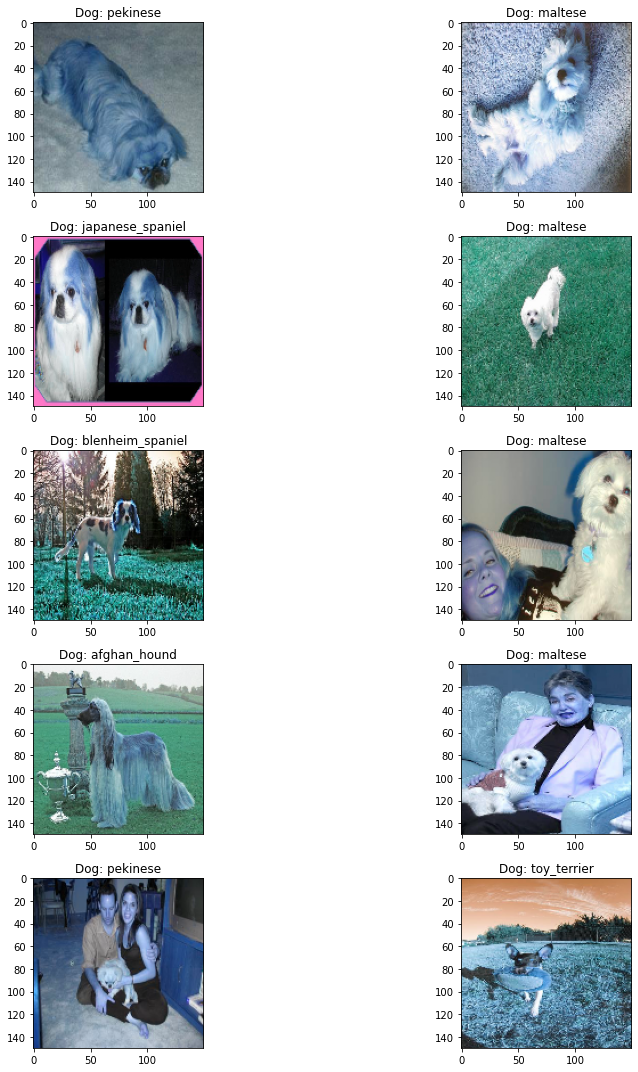

In [7]:
import matplotlib.pyplot as plt
import random as rdm    # 导入随机数工具
# 随机显示几张图片
fig, ax = plt.subplots(5, 2)
fig.set_size_inches(15, 15)
for i in range(5):
    for j in range(2):
        r = rdm.randint(0, len(X))
        ax[i, j].imshow(X[r])
        ax[i, j].set_title('Dog: '+ y_label[r])
plt.tight_layout()

In [8]:
#  随机地乱序并拆分训练集和测试集
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =0.2, random_state =0)

### 6.5.2 构建简单的卷积网络


In [9]:
# 构建简单的卷积网络：
from keras import layers # 导入所有层
from keras import models # 导入所有模型
cnn = models.Sequential() # 序贯模型
cnn.add(layers.Conv2D(32, (3, 3), activation='relu', # 卷积层
                                            input_shape=(150, 150, 3)))
cnn.add(layers.MaxPooling2D((2, 2)))    # 最大池化
cnn.add(layers.Conv2D(64, (3, 3), activation='relu'))   # 卷积层
cnn.add(layers.MaxPooling2D((2, 2)))    # 最大池化
cnn.add(layers.Conv2D(128, (3, 3), activation='relu'))   # 卷积层
cnn.add(layers.MaxPooling2D((2, 2)))    # 最大池化
cnn.add(layers.Conv2D(128, (3, 3), activation='relu'))   # 卷积层
cnn.add(layers.MaxPooling2D((2, 2)))    # 最大池化
cnn.add(layers.Flatten()) # 展平
cnn.add(layers.Dense(512, activation='relu')) # 全连接
cnn.add(layers.Dense(10, activation='softmax')) # 分类输出
cnn.compile(loss='categorical_crossentropy', # 损失函数
            optimizer='RMSprop', # 优化器
            metrics=['acc']) # 评估指标

### 6.5.3 训练网络并显示误差和准确率

In [10]:
history = cnn.fit(X_train, y_train, # 指定训练集
                                epochs=50, # 指定轮次
                                batch_size=256, # 指定批次大小
                                validation_data=(X_test, y_test)) # 指定验证集

Epoch 1/50
7/7 [==============================] - 17s 2s/step - loss: 3.5460 - acc: 0.1113 - val_loss: 2.2916 - val_acc: 0.1610
Epoch 2/50
7/7 [==============================] - 16s 2s/step - loss: 2.2945 - acc: 0.1399 - val_loss: 2.6708 - val_acc: 0.1195
Epoch 3/50
7/7 [==============================] - 16s 2s/step - loss: 2.3453 - acc: 0.1692 - val_loss: 2.3036 - val_acc: 0.0961
Epoch 4/50
7/7 [==============================] - 16s 2s/step - loss: 2.2899 - acc: 0.1301 - val_loss: 2.3202 - val_acc: 0.1351
Epoch 5/50
7/7 [==============================] - 16s 2s/step - loss: 2.2626 - acc: 0.1692 - val_loss: 6.2638 - val_acc: 0.1195
Epoch 6/50
7/7 [==============================] - 16s 2s/step - loss: 2.8887 - acc: 0.1321 - val_loss: 2.3837 - val_acc: 0.0935
Epoch 7/50
7/7 [==============================] - 16s 2s/step - loss: 2.2780 - acc: 0.1360 - val_loss: 14.0199 - val_acc: 0.0935
Epoch 8/50
7/7 [==============================] - 17s 2s/step - loss: 4.1664 - acc: 0.1965 - val_loss: 

In [11]:
 # 显示训练过程中的学习曲线
def show_history(history):
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(1, len(loss)+1)
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(epochs, loss, 'bo', label='Training loss')
    plt.plot(epochs, val_loss, 'b', label = 'Validation loss')
    plt.title('Training and validation loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    acc = history.history['acc']
    val_acc = history.history['val_acc']
    plt.subplot(1, 2, 2)
    plt.plot(epochs, acc, 'bo', label='Training acc')
    plt.plot(epochs, val_acc, 'b', label = 'Validation acc')
    plt.title('Training and validation accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

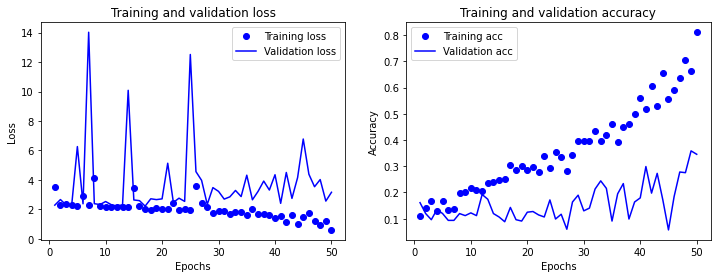

In [12]:
show_history(history)

### 6.6.1 更新优化器并设置学习速率

In [13]:
from keras import optimizers    # 导入优化器
cnn = models.Sequential() # 序贯模型
cnn.add(layers.Conv2D(32, (3, 3), activation='relu', # 卷积层
                                            input_shape=(150, 150, 3)))
cnn.add(layers.MaxPooling2D((2, 2)))    # 最大池化
cnn.add(layers.Conv2D(64, (3, 3), activation='relu'))   # 卷积层
cnn.add(layers.MaxPooling2D((2, 2)))    # 最大池化
cnn.add(layers.Conv2D(128, (3, 3), activation='relu'))   # 卷积层
cnn.add(layers.MaxPooling2D((2, 2)))    # 最大池化
cnn.add(layers.Conv2D(256, (3, 3), activation='relu'))   # 卷积层
cnn.add(layers.MaxPooling2D((2, 2)))    # 最大池化
cnn.add(layers.Flatten()) # 展平
cnn.add(layers.Dense(512, activation='relu')) # 全连接
cnn.add(layers.Dense(10, activation='sigmoid')) # 分类输出
cnn.compile(loss='categorical_crossentropy', # 损失函数
            optimizer=optimizers.Adam(lr=1e-4), # 更新优化器并设定学习速率
            metrics=['acc']) # 评估指标

history = cnn.fit(X_train, y_train, # 指定训练集
                                epochs=50, # 指定轮次
                                batch_size=256, # 指定批次大小
                                validation_data=(X_test, y_test)) # 指定验证集

Epoch 1/50
7/7 [==============================] - 17s 2s/step - loss: 2.2985 - acc: 0.1197 - val_loss: 2.2903 - val_acc: 0.1195
Epoch 2/50
7/7 [==============================] - 17s 2s/step - loss: 2.2831 - acc: 0.1256 - val_loss: 2.2971 - val_acc: 0.1195
Epoch 3/50
7/7 [==============================] - 18s 3s/step - loss: 2.2867 - acc: 0.1256 - val_loss: 2.3055 - val_acc: 0.1195
Epoch 4/50
7/7 [==============================] - 18s 3s/step - loss: 2.2839 - acc: 0.1256 - val_loss: 2.3035 - val_acc: 0.1195
Epoch 5/50
7/7 [==============================] - 17s 2s/step - loss: 2.2779 - acc: 0.1256 - val_loss: 2.2938 - val_acc: 0.1195
Epoch 6/50
7/7 [==============================] - 17s 2s/step - loss: 2.2724 - acc: 0.1256 - val_loss: 2.2819 - val_acc: 0.1195
Epoch 7/50
7/7 [==============================] - 17s 2s/step - loss: 2.2671 - acc: 0.1431 - val_loss: 2.2739 - val_acc: 0.1169
Epoch 8/50
7/7 [==============================] - 17s 2s/step - loss: 2.2600 - acc: 0.1087 - val_loss: 2

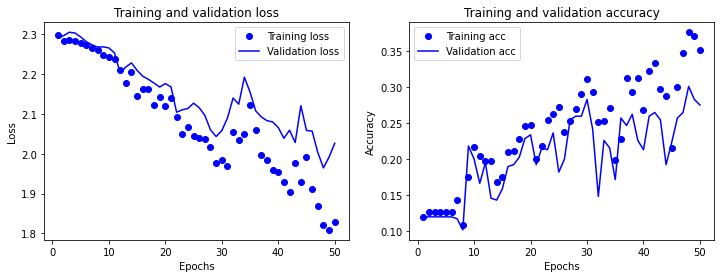

In [14]:
show_history(history)

### 6.6.2 添加Dropout层

In [15]:
from keras import optimizers    # 导入优化器
cnn = models.Sequential() # 序贯模型
cnn.add(layers.Conv2D(32, (3, 3), activation='relu', # 卷积层
                                            input_shape=(150, 150, 3)))
cnn.add(layers.MaxPooling2D((2, 2)))    # 最大池化
cnn.add(layers.Conv2D(64, (3, 3), activation='relu'))   # 卷积层
cnn.add(layers.MaxPooling2D((2, 2)))    # 最大池化
cnn.add(layers.Conv2D(128, (3, 3), activation='relu'))   # 卷积层
cnn.add(layers.MaxPooling2D((2, 2)))    # 最大池化
cnn.add(layers.Conv2D(256, (3, 3), activation='relu'))   # 卷积层
cnn.add(layers.MaxPooling2D((2, 2)))    # 最大池化
cnn.add(layers.Flatten()) # 展平
cnn.add(layers.Dropout(0.5)) # Dropout
cnn.add(layers.Dense(512, activation='relu')) # 全连接
cnn.add(layers.Dense(10, activation='sigmoid')) # 分类输出
cnn.compile(loss='categorical_crossentropy', # 损失函数
            optimizer=optimizers.Adam(lr=1e-4), # 更新优化器并设定学习速率
            metrics=['acc']) # 评估指标

history = cnn.fit(X_train, y_train, # 指定训练集
                                epochs=50, # 指定轮次
                                batch_size=256, # 指定批次大小
                                validation_data=(X_test, y_test)) # 指定验证集

Epoch 1/50
7/7 [==============================] - 18s 3s/step - loss: 2.2956 - acc: 0.1256 - val_loss: 2.2895 - val_acc: 0.1662
Epoch 2/50
7/7 [==============================] - 18s 3s/step - loss: 2.2799 - acc: 0.1627 - val_loss: 2.2909 - val_acc: 0.1403
Epoch 3/50
7/7 [==============================] - 18s 3s/step - loss: 2.2748 - acc: 0.1796 - val_loss: 2.2845 - val_acc: 0.1325
Epoch 4/50
7/7 [==============================] - 17s 2s/step - loss: 2.2687 - acc: 0.1809 - val_loss: 2.2794 - val_acc: 0.1714
Epoch 5/50
7/7 [==============================] - 18s 3s/step - loss: 2.2639 - acc: 0.1503 - val_loss: 2.2696 - val_acc: 0.1195
Epoch 6/50
7/7 [==============================] - 18s 3s/step - loss: 2.2555 - acc: 0.1262 - val_loss: 2.2659 - val_acc: 0.1195
Epoch 7/50
7/7 [==============================] - 18s 3s/step - loss: 2.2447 - acc: 0.1269 - val_loss: 2.2451 - val_acc: 0.1195
Epoch 8/50
7/7 [==============================] - 18s 3s/step - loss: 2.2377 - acc: 0.1360 - val_loss: 2

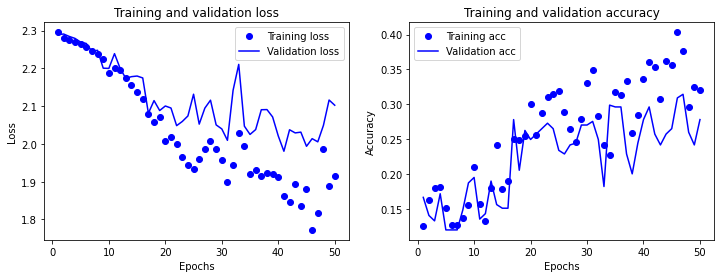

In [16]:
show_history(history)

### 6.6.3 数据增强

In [28]:
# 定义一个数据增强器，并设定各种增强选项
from keras.preprocessing.image import ImageDataGenerator
augs_gen = ImageDataGenerator(
           featurewise_center=False,
           samplewise_center=False,         
           featurewise_std_normalization=False,          
           samplewise_std_normalization=False,  
           zca_whitening=False, 
           rotation_range=10,  
           zoom_range = 0.1, 
           width_shift_range=0.2,  
           height_shift_range=0.2,
           horizontal_flip=True,  
           vertical_flip=False) 
augs_gen.fit(X_train) # 针对训练集拟合数据增强器

In [31]:
len(X_train)

1537

In [33]:
len(X_test)

385

In [36]:
# 通过fit_generator方法动态生成被增强后的训练集
history = cnn.fit_generator( # 使用fit_generator
    augs_gen.flow(X_train,y_train,batch_size=16), # 增强后的训练集
    validation_data  = (X_test,y_test), # 指定验证集
    validation_steps = 20, # 指定验证步长
    steps_per_epoch  = 50, # 指定每轮步长
    epochs = 50,  # 指定轮次
    verbose = 1) # 指定是否显示训练过程中的信息

Epoch 1/50
50/50 [==============================] - 13s 267ms/step - loss: 1.3930 - acc: 0.5225 - val_loss: 1.7568 - val_acc: 0.4338
Epoch 2/50
50/50 [==============================] - 14s 272ms/step - loss: 1.4354 - acc: 0.5057 - val_loss: 1.9469 - val_acc: 0.3610
Epoch 3/50
50/50 [==============================] - 13s 269ms/step - loss: 1.5463 - acc: 0.4561 - val_loss: 1.8663 - val_acc: 0.3455
Epoch 4/50
50/50 [==============================] - 13s 268ms/step - loss: 1.5573 - acc: 0.4713 - val_loss: 1.7230 - val_acc: 0.4078
Epoch 5/50
50/50 [==============================] - 13s 268ms/step - loss: 1.5054 - acc: 0.4701 - val_loss: 1.6997 - val_acc: 0.4390
Epoch 6/50
50/50 [==============================] - 13s 269ms/step - loss: 1.4125 - acc: 0.5083 - val_loss: 1.8116 - val_acc: 0.3844
Epoch 7/50
50/50 [==============================] - 14s 273ms/step - loss: 1.4329 - acc: 0.5025 - val_loss: 1.7779 - val_acc: 0.4104
Epoch 8/50
50/50 [==============================] - 13s 268ms/step - 

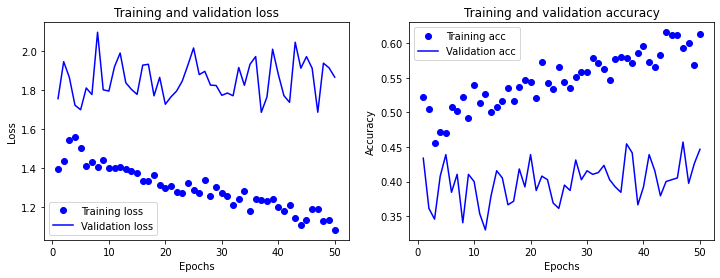

In [37]:
show_history(history)

In [38]:
from keras.models import load_model # 导入模型保存工具
cnn.save('../my_dog_cnn.h5')  # 创建一个HDF5格式的文件'my_dog_cnn.h5'
del cnn  # 删除当前模型
cnn = load_model('../my_dog_cnn.h5') # 重新载入已经保存的模型

## 6.7 卷积网络中特征通道的可视化

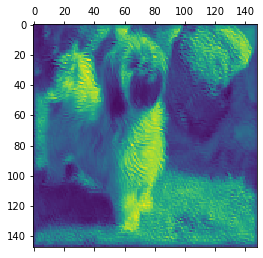

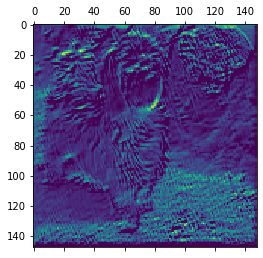

In [39]:
from keras.models import load_model # 导入模型保存工具
import matplotlib.pyplot as plt # 导入matplotlib
model = load_model('../my_dog_cnn.h5')# 载入刚才保存的模型
# 绘制特征通道
layer_outputs = [layer.output for layer in model.layers[:16]]
image = X_train[0]
image = image.reshape(1, 150, 150, 3)
activation_model = models.Model(inputs=model.input, outputs=layer_outputs)
activations = activation_model.predict(image)
first_layer_activation = activations[0]
plt.matshow(first_layer_activation[0, :, :, 2], cmap='viridis')
plt.matshow(first_layer_activation[0, :, :, 3], cmap='viridis')